In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import mapclassify as mc

In [2]:
# Import data
MDcounties = gpd.read_file("https://geodata.md.gov/imap/rest/services/Boundaries/MD_PhysicalBoundaries/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json")
    
UScases = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv")

MDcountypop = pd.read_csv("https://raw.githubusercontent.com/awbecker25/covidviz/master/mdcounty2018pop.csv")

# View cases dataset
UScases.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,149,151,151,151,151,152,152,152,154,154
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,15,15,16,16,19,19,19,19,19,21
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,2031,2156,2173,2198,2256,2299,2329,2427,2542,2589
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,66,68,68,69,69,69,69,69,69,69


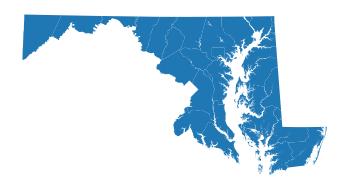

In [6]:
# Project MD counties to "NAD83 / Maryland (ftUS)" CRS
MDcounties = MDcounties.to_crs("EPSG:2248")

# View MD county geometries
MDcounties.plot().set_axis_off()

In [7]:
# Restrict to MD cases and variables of interest
MDcases = UScases[(UScases.Province_State == "Maryland")].drop(columns = ["UID", "iso2", "iso3", "code3",
                                                                          "Province_State", "Combined_Key",
                                                                          "Admin2", "Country_Region", "Lat",
                                                                          "Long_"])
MDcases.head()

,FIPS,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20
1198,24001.0,0,0,0,0,0,0,0,0,0,...,143,143,144,146,146,148,149,150,151,160
1199,24003.0,0,0,0,0,0,0,0,0,0,...,2194,2290,2372,2463,2492,2520,2596,2661,2752,2801
1200,24005.0,0,0,0,0,0,0,0,0,0,...,3662,3763,3737,3862,3948,4051,4160,4290,4399,4549
1201,24009.0,0,0,0,0,0,0,0,0,0,...,188,191,202,206,209,211,214,225,228,237
1202,24011.0,0,0,0,0,0,0,0,0,0,...,105,107,110,133,167,174,177,183,190,200


In [8]:
# Merge cases and 2018 ACS total population estimates
MDcases["FIPS"] = MDcases.FIPS.astype(int)

popmerged = pd.merge(MDcases, MDcountypop, on = "FIPS").drop(columns = ["FIPS", "STATE"]).rename(columns = {"NAME" : "COUNTY"})

popmerged["COUNTY"] = popmerged["COUNTY"].str.strip()

popmerged.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,COUNTY,2018POP
0,0,0,0,0,0,0,0,0,0,0,...,144,146,146,148,149,150,151,160,Allegany,71977
1,0,0,0,0,0,0,0,0,0,0,...,2372,2463,2492,2520,2596,2661,2752,2801,Anne Arundel,567696
2,0,0,0,0,0,0,0,0,0,0,...,3737,3862,3948,4051,4160,4290,4399,4549,Baltimore,827625
3,0,0,0,0,0,0,0,0,0,0,...,202,206,209,211,214,225,228,237,Calvert,91082
4,0,0,0,0,0,0,0,0,0,0,...,110,133,167,174,177,183,190,200,Caroline,32875


In [9]:
# Calculate IR
popmerged["ir"] = (popmerged["5/7/20"] / popmerged["2018POP"]) * 100000

popmerged.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,COUNTY,2018POP,ir
0,0,0,0,0,0,0,0,0,0,0,...,146,146,148,149,150,151,160,Allegany,71977,198.674577
1,0,0,0,0,0,0,0,0,0,0,...,2463,2492,2520,2596,2661,2752,2801,Anne Arundel,567696,386.474451
2,0,0,0,0,0,0,0,0,0,0,...,3862,3948,4051,4160,4290,4399,4549,Baltimore,827625,442.470926
3,0,0,0,0,0,0,0,0,0,0,...,206,209,211,214,225,228,237,Calvert,91082,206.407413
4,0,0,0,0,0,0,0,0,0,0,...,133,167,174,177,183,190,200,Caroline,32875,319.391635


In [10]:
# Join tabular data to MD county geometries
MDcounties["COUNTY"] = MDcounties["COUNTY"].str.strip()

map_df = pd.merge(MDcounties, popmerged, on = "COUNTY")

map_df = gpd.GeoDataFrame(map_df)

map_df.head()

,OBJECTID,COUNTY,DISTRICT,COUNTY_FIP,COUNTYNUM,CREATION_D,LAST_UPDAT,geometry,1/22/20,1/23/20,...,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,2018POP,ir
0,1,Allegany,6.0,1,1,1264636800000,1264636800000,"MULTIPOLYGON (((934591.628 751432.324, 934534....",0,0,...,144,146,146,148,149,150,151,160,71977,198.674577
1,2,Anne Arundel,5.0,3,2,1145318400000,1145318400000,"MULTIPOLYGON (((1423943.417 569277.182, 142422...",0,0,...,2372,2463,2492,2520,2596,2661,2752,2801,567696,386.474451
2,3,Baltimore,4.0,5,3,1160352000000,1160352000000,"MULTIPOLYGON (((1433931.971 735711.559, 143393...",0,0,...,3737,3862,3948,4051,4160,4290,4399,4549,827625,442.470926
3,4,Baltimore City,0.0,510,24,1145318400000,1258329600000,"MULTIPOLYGON (((1445298.207 621403.380, 144540...",0,0,...,3208,3317,3353,3404,3476,3505,3606,3719,614700,464.616886
4,5,Calvert,5.0,9,4,1264636800000,1264636800000,"MULTIPOLYGON (((1414368.941 401731.221, 141442...",0,0,...,202,206,209,211,214,225,228,237,91082,206.407413


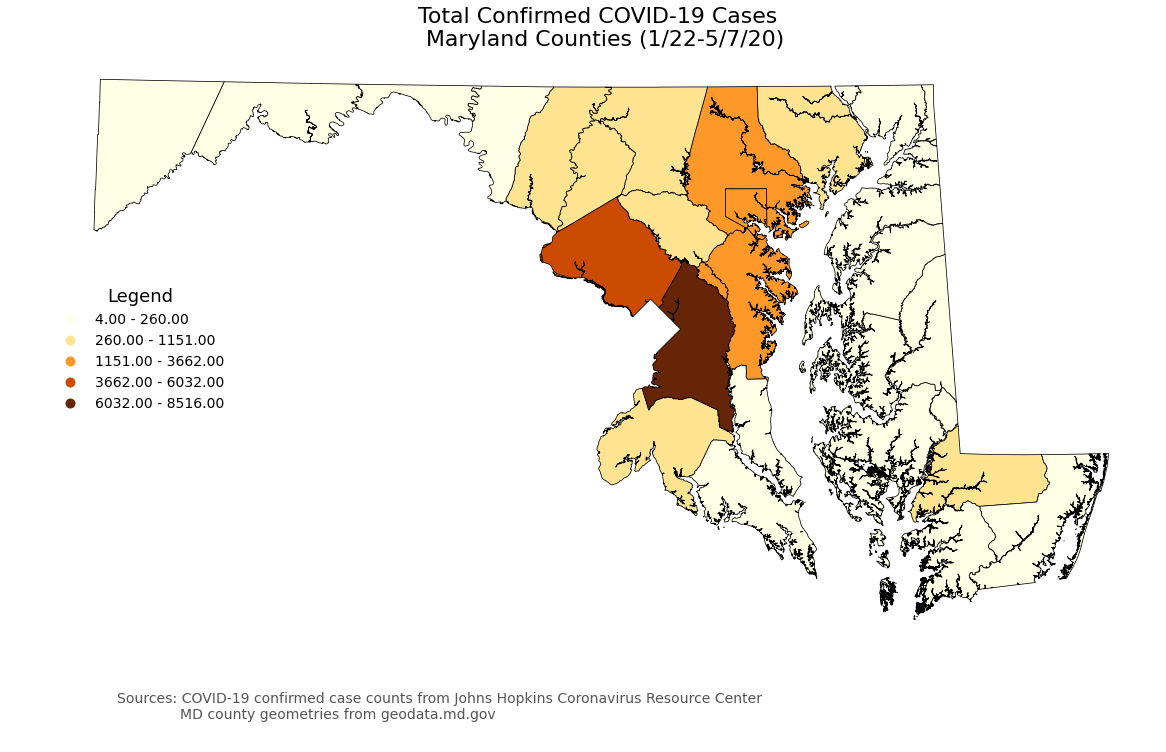

In [55]:
## Plot raw total cases

# plot map
map_df.plot(column = "5/7/20",
            cmap = "YlOrBr",
            figsize = (20, 12),
            linewidth = 0.75,
            edgecolor = "black",
            legend = True,
            scheme = "naturalbreaks",
            legend_kwds = {"loc" : "center left",
                           "frameon" : False,
                           "title" : "Legend",
                           "title_fontsize" : 18,
                           "fontsize" : 14})

# remove axis
plt.axis("off")

# add title
plt.title("Total Confirmed COVID-19 Cases \n Maryland Counties (1/22-5/7/20)",
          loc = "Center",
          fontdict = {'fontsize' : 22})

# add annotation
plt.annotate("Sources: COVID-19 confirmed case counts from Johns Hopkins Coronavirus Resource Center \n              MD county geometries from geodata.md.gov",
             xy = (0.1, .08),
             xycoords = "figure fraction",
             horizontalalignment = "left",
             verticalalignment = "top",
             fontsize = 14,
             color = "#555555")

# export map image
plt.savefig("totalcasemap.png",
            dpi=300)

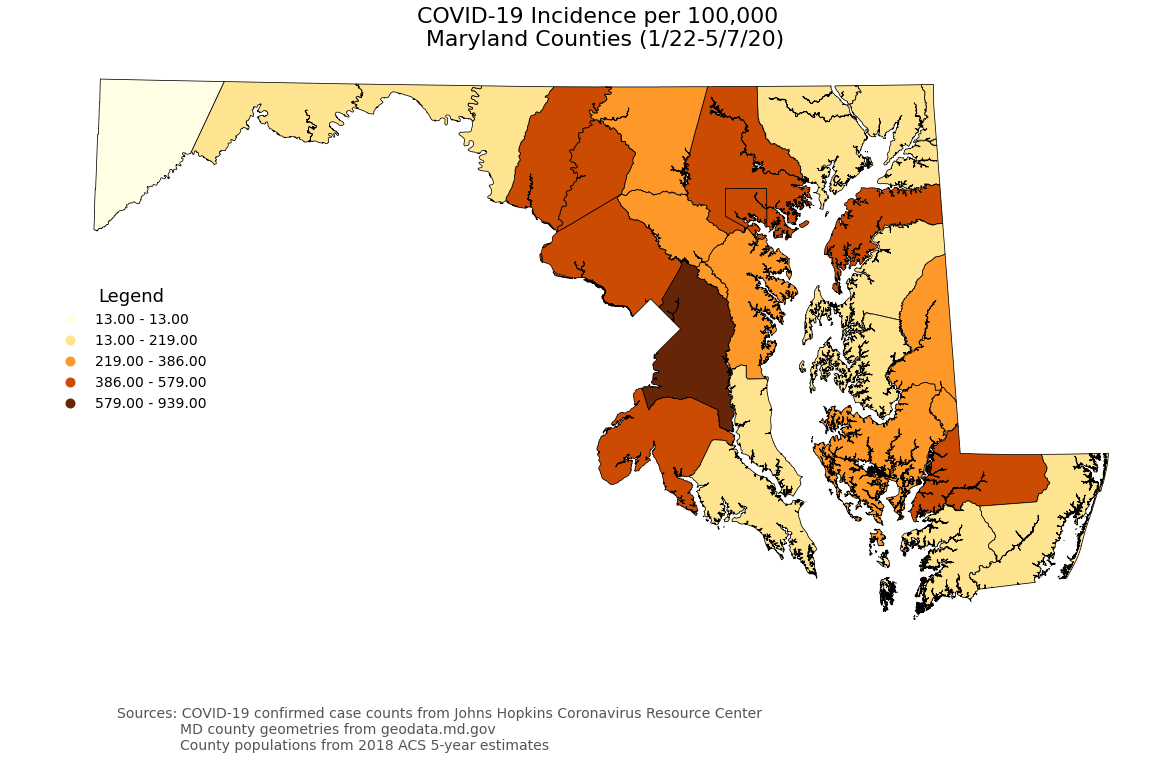

In [53]:
## Plot incidence rate per 100,000 (IR calculated using 2018 ACS pop estimates)

# round IR to integer
map_df["ir_round"] = map_df["ir"].astype(int)

# plot map
map_df.plot(column = "ir_round",
            cmap = "YlOrBr",
            figsize = (20, 12),
            linewidth = 0.75,
            edgecolor = "black",
            legend = True,
            scheme = "naturalbreaks",
            legend_kwds = {"loc" : "center left",
                           "frameon" : False,
                           "title" : "Legend",
                           "title_fontsize" : 18,
                           "fontsize" : 14})

# remove axis
plt.axis("off")

# add title
plt.title("COVID-19 Incidence per 100,000 \n Maryland Counties (1/22-5/7/20)",
          loc = "Center",
          fontdict = {"fontsize" : 22})

# add annotation
plt.annotate("Sources: COVID-19 confirmed case counts from Johns Hopkins Coronavirus Resource Center \n              MD county geometries from geodata.md.gov \n              County populations from 2018 ACS 5-year estimates",
             xy = (0.1, .08),
             xycoords = "figure fraction",
             horizontalalignment = "left",
             verticalalignment = "top",
             fontsize = 14,
             color = "#555555")

# export map image
plt.savefig("ratemap.png",
            dpi = 300)